Theo Filus Handy S - 0706022210051

In [1]:
#Import Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [2]:
#Load Dataset

df = pd.read_csv("https://raw.githubusercontent.com/ImmanuelNK/Dataset-DATAMINING/refs/heads/main/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


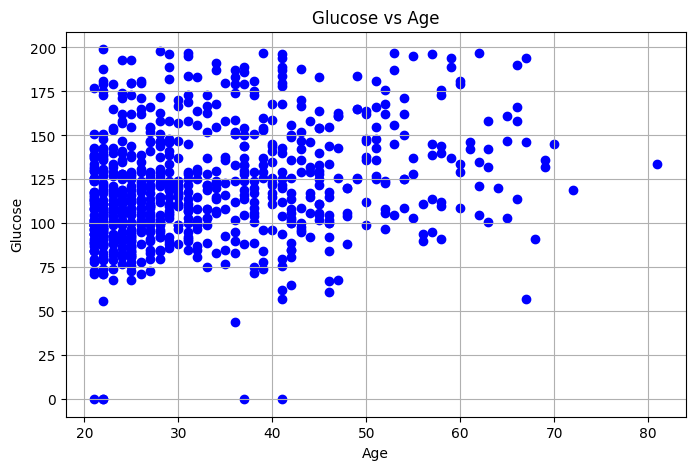

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['Glucose'], color='blue')
plt.title('Glucose vs Age')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.grid(True)
plt.show()

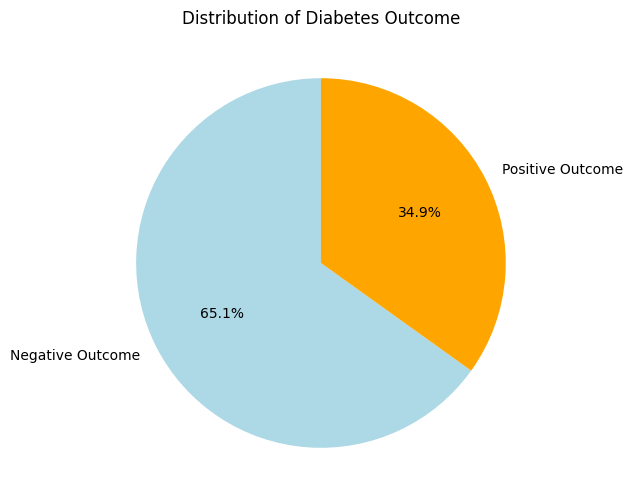

In [7]:
labels = ['Negative Outcome', 'Positive Outcome']
outcome_counts = df['Outcome'].value_counts()

# Membuat Pie Chart
plt.figure(figsize=(6,6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Distribution of Diabetes Outcome')
plt.show()

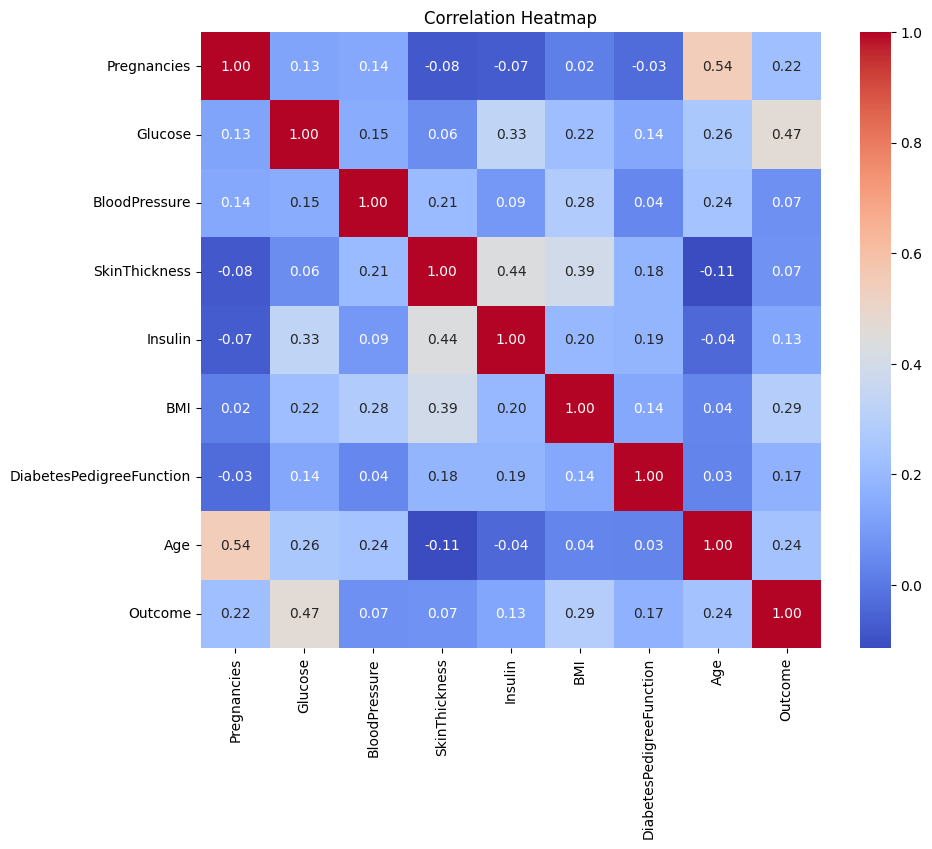

In [8]:
correlation_matrix = df.corr() #calculate the correlation between numeric columns in the DataFrame df using the .corr() method
plt.figure(figsize=(10, 8)) #set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #create a heatmap using the previously calculated correlation matrix
plt.title("Correlation Heatmap") #title
plt.show() #display the heatmap

### **SPLITING X & Y**

In [9]:
x = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:

x_train.shape, x_test.shape

((614, 8), (154, 8))

In [12]:
clf_entro = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf_entro.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [13]:
y_pred_entro = clf_entro.predict(x_test)

In [14]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entro)))

Model accuracy score with criterion entropy: 0.7662


In [15]:
print('Training set score: {0:0.4f}' .format(clf_entro.score(x_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_entro.score(x_test, y_test)))

Training set score: 0.7752
Test set score: 0.7662


[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.533\nsamples = 33\nvalue = [29, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples

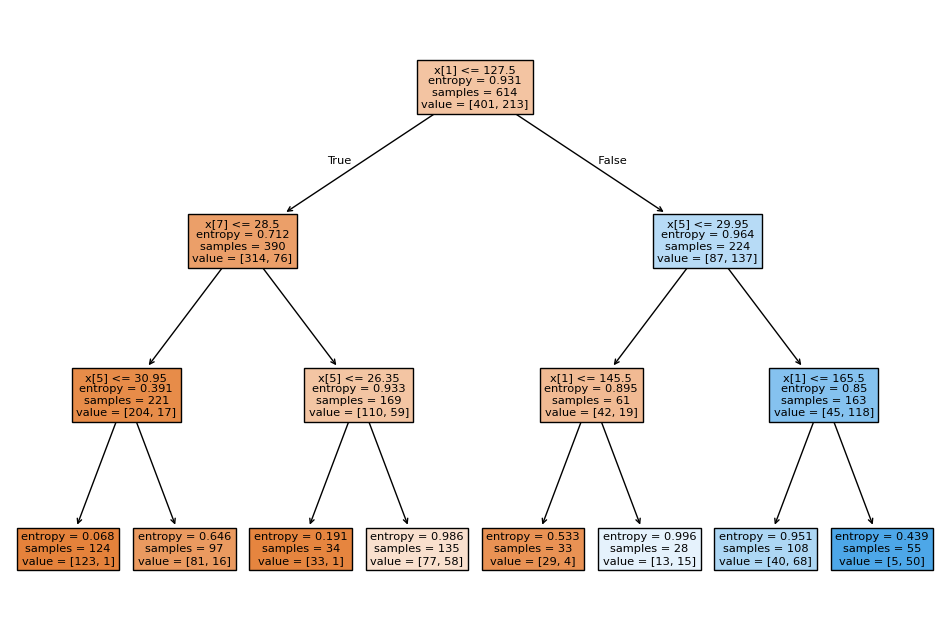

In [16]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf_entro.fit(x_train, y_train), filled = True)

## **Criterian Gini Index**

In [17]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
y_pred_gini = clf_gini.predict(x_test)


In [19]:
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7597


In [20]:
print('Training set score: {0:0.4f}' .format(clf_gini.score(x_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_gini.score(x_test, y_test)))

Training set score: 0.7769
Test set score: 0.7597


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]'),
 Text(

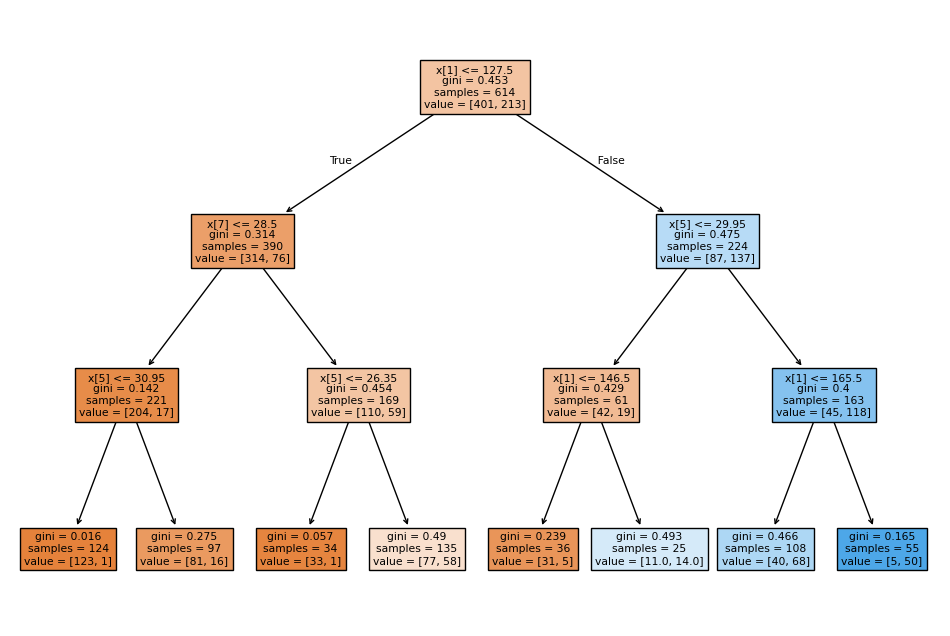

In [21]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(x_train, y_train), filled = True)

## Confusion matrix and classification report of criterion Entropy and Gini **index**

In [22]:

entropi = confusion_matrix(y_test, y_pred_entro)
gini = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix entropy: \n', entropi)
print('Confusion matrix gini index: \n', gini)

Confusion matrix entropy: 
 [[83 16]
 [20 35]]
Confusion matrix gini index: 
 [[83 16]
 [21 34]]


In [23]:
print('Classification Report Entropy')
print(classification_report(y_test, y_pred_entro))
print('Classification Report Gini Index')
print(classification_report(y_test, y_pred_gini))

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



Naive Bayes

In [24]:
x_train = x_train.dropna()
y_train = y_train[x_train.index]

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [25]:

nb_y_pred = nb_classifier.predict(x_test)

In [26]:

print('Accuracy Score with GaussianNB: {0:0.1f}'.format(accuracy_score(y_test, nb_y_pred)))

Gauss = confusion_matrix(y_test, nb_y_pred)
print('Confusion matrix GaussianNB: \n', Gauss)

print('Training set score: {0:0.4f}' .format(nb_classifier.score(x_train, y_train)))
print('Test set score: {0:0.4f}' .format(nb_classifier.score(x_test, y_test)))

Accuracy Score with GaussianNB: 0.8
Confusion matrix GaussianNB: 
 [[79 20]
 [16 39]]
Training set score: 0.7524
Test set score: 0.7662


In [27]:
print('Classification Report GaussianNB')
print(classification_report(y_test, nb_y_pred))

Classification Report GaussianNB
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [28]:
#From the report we conclude that the accuracy score is 0.77 / 77%
#Precision, recall, and f1-score has score below accuracy

Logistic **Reggresion**

In [29]:
from sklearn.linear_model import LogisticRegression

#Create an instance of the Logistic Regression classifier
#'max_iter=200' sets the maximum number of iterations for the solver to converge
classifier = LogisticRegression(max_iter=200)

#Fit the logistic regression model to the training data
#The model learns the relationship between the features in 'X_train' and the target labels in 'y_train'
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [30]:

from sklearn.linear_model import LogisticRegression

#Create an instance of the Logistic Regression classifier
#'max_iter=200' sets the maximum number of iterations for the solver to converge
classifier = LogisticRegression(max_iter=200)

#Fit the logistic regression model to the training data
#The model learns the relationship between the features in 'X_train' and the target labels in 'y_train'
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [31]:

#Use the trained logistic regression classifier to predict the labels for the test data 'X_test'
y_pred_log = classifier.predict(x_test)

#Create a comparison table to show actual vs predicted labels
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})

#Display the first few rows of the comparison table
print(comparison_table.head())

     y_test  y_pred
668       0       0
324       0       0
624       0       0
690       0       0
473       0       0


In [33]:

print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))

Accuracy Score: 0.7468


In [34]:
#Create the confusion matrix for the logistic regression model predictions
cmatrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cmatrix)

Confusion Matrix:
 [[78 21]
 [18 37]]


In [35]:
#Print the classification report for the logistic regression model predictions
#This report includes precision, recall, F1-score, and support for each class
print(classification_report(y_test, y_pred_log))

#Conclusion
#The logistic regression model has an overall accuracy of 0.75. It performs better for class 0, with a precision of 0.81, recall of 0.79,
#and an F1-score of 0.80, while class 1 has lower precision at 0.64, recall at 0.67, and an F1-score of 0.65. The model seems balanced overall,
# it struggles more with class 1 predictions, as seen by the lower performance metrics compared to class 0.

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

